In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [236]:
df = pd.read_csv('profiles.csv')

df['sex'] = df['sex'].map({'m':1, 'f':0}) # Male = 1, Female =0

orientation_map = {'bisexual':2, 'straight':1, 'gay':0}
df['orientation'] = df['orientation'].map(orientation_map)


smokes_map = {'trying to quit':4, 'yes':3, 'when drinking':2, 'sometimes':1, 'no':0}
df['smokes'] = df['smokes'].map(smokes_map)
df['smokes'] = df['smokes'].fillna(value = 0)

drugs_map = {'often':2, 'sometimes':1, 'never':0}
df['drugs'] = df['drugs'].map(drugs_map)
df['drugs'] = df['drugs'].fillna(value = 0)

drinks_map = {'desperately':5, 'very often ':4, 'often':3, 'socially':2, 'rarely':1, 'not at all':0}
df['drinks'] = df['drinks'].map(drinks_map)
df['drinks'] = df['drinks'].fillna(value = 2)

essay_col = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
all_essays = df[essay_col].replace(np.nan, '', regex=True)
all_essays = all_essays[essay_col].apply(lambda x: ' '.join(x), axis=1)
df['len_essay'] = all_essays.apply(lambda x: len(x))



In [ ]:
education_map ={\
                ('graduated from college/university' or 'college/university' or 'working on masters program' or \
                'working on law school' or 'working on med school' or 'dropped out of masters program' or \
                'dropped out of ph.d program' or 'dropped out of law school' or 'dropped out of med school'):2,\
                ('') : 1}
df['education'] = df['education'].map(education_map)

In [237]:
print(df.columns)
print(df['education'].value_counts(dropna = False))
# print(df['len_essay'].max())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'len_essay'],
      dtype='object')
graduated from college/university    23959
graduated from masters program        8961
NaN                                   6628
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped

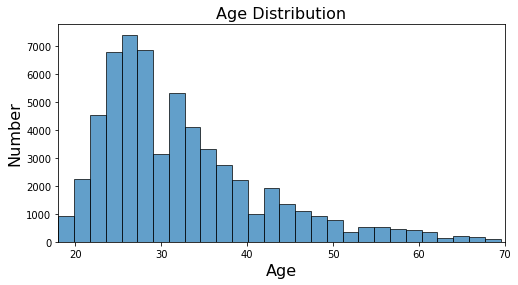

In [127]:
fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.hist(df.age, bins=50, alpha=0.7, edgecolor='black')
# sns.distplot(df.age, kde=False, rug=True)
plt.xlim(18,70)
plt.xlabel('Age', fontsize='16')
plt.ylabel('Number', fontsize='16')
plt.title('Age Distribution', fontsize='16')
plt.show()

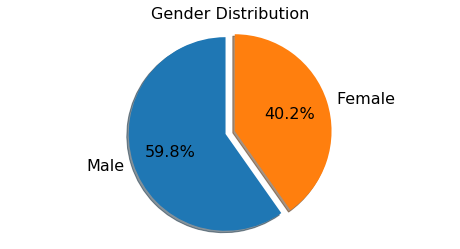

In [126]:
sex_labels = ['Male', 'Female']
sex_explode = (0, 0.1)
fig2, ax2 = plt.subplots(figsize=(8,4))
ax2.pie(df.sex.value_counts(), explode = sex_explode, labels = sex_labels, \
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 16})
ax2.axis('equal')
plt.title('Gender Distribution', fontsize='16')
plt.show()

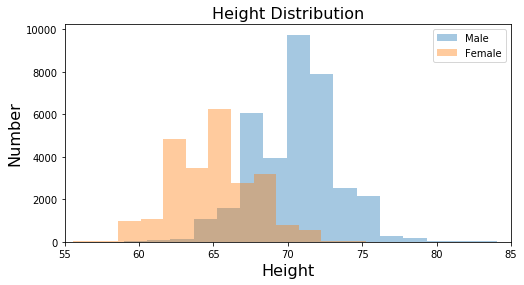

In [188]:
df['height'] = df['height'].fillna(value = df.height.mean())


fig3, ax3 = plt.subplots(figsize=(8,4))
ax3.hist(df[df.sex==1].height, bins=60, alpha=0.4, label = 'Male')
ax3.hist(df[df.sex==0].height, bins=60, alpha=0.4, label = 'Female')

# sns.distplot(df[df.sex==1].height, kde=False, label = 'Male')
# sns.distplot(df[df.sex==0].height, kde=False, label = 'Male')

plt.xlim(55,85)
plt.legend()
plt.xlabel('Height', fontsize='16')
plt.ylabel('Number', fontsize='16')
plt.title('Height Distribution', fontsize='16')
plt.show()

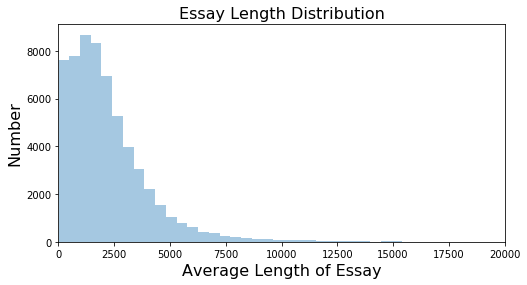

In [229]:
fig4, ax4 = plt.subplots(figsize=(8,4))
# ax4.hist(df['len_essay'], bins=1000, alpha=0.4)

sns.distplot(df['len_essay'], hist=True, bins=200, kde=False)

plt.xlim(0,20000)
# plt.legend()
plt.xlabel('Average Length of Essay', fontsize='16')
plt.ylabel('Number', fontsize='16')
plt.title('Essay Length Distribution', fontsize='16')
plt.show()